## Build MRCNN Model -Load MRCNN and FCN weights - Load Training Files  

In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib          import cm
import mrcnn.utils       as utils
import mrcnn.visualize   as visualize
from mrcnn.prep_notebook import build_fcn_training_pipeline, run_mrcnn_training_pipeline
from mrcnn.prep_notebook import build_fcn_inference_pipeline_newshapes, build_mrcnn_inference_pipeline
from mrcnn.prep_notebook import run_mrcnn_detection
from mrcnn.visualize     import display_training_batch
from mrcnn.prep_notebook import get_inference_batch, get_image_batch, run_mrcnn_detection, run_fcn_detection
from mrcnn.coco          import prep_coco_dataset
from mrcnn.newshapes     import prep_newshape_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks


In [11]:
# WEIGHT_FILE = 'F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_2298.h5' 
# FCN_WEIGHT_FILE = 'F:\\models_newshapes\\train_fcn8_l2_newshapes\\fcn20181224T0000\\fcn_0821.h5'
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --dataset        newshapes "
input_parms +=" --mrcnn_logs_dir train_mrcnn "
input_parms +=" --fcn_logs_dir   train_fcn8_l2_newshapes " 
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      last "
# input_parms +=" --fcn_model      last "
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8l2 " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor   1"
# input_parms +=" --coco_classes  
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8_l2_newshapes
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 False
   opt                            ADAGRAD
   scale_factor                   1
   steps_in_epoch                 1
   sysout                         SCREEN
   val_steps

In [1]:
mrcnn_model, fcn_model = build_fcn_inference_pipeline_newshapes(args = args)

NameError: name 'build_fcn_inference_pipeline_newshapes' is not defined

## Load MRCNN  and FCN Weights

In [ ]:
MRCNN_DIR_WEIGHTS =  'F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000'

# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
mrcnn_files   = ['mrcnn_0001.h5', 'mrcnn_0058.h5', 'mrcnn_0152.h5', 'mrcnn_0247.h5', 'mrcnn_0389.h5','mrcnn_0472.h5']

In [ ]:
FILE_IDX = -1
mrcnn_weights_file = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[FILE_IDX])
print("Loading weights ", mrcnn_weights_file)
mrcnn_model.load_model_weights(mrcnn_weights_file)

In [ ]:
FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization

fcn_files = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
             'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
             'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
             'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
              'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

In [ ]:
FILE_IDX = 10
fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", fcn_weights_file)
fcn_model.load_model_weights(fcn_weights_file)

## Build test datasets

In [6]:
# del dataset_train, dataset_val, train_generator, val_generator
# dataset_test , test_generator   = prep_newshape_dataset( mrcnn_model.config,  1000, generator=True)
# with open('newshapes_dataset_1000_B.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
## -- OR --

# with open("E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_test_dataset_1000.pkl", 'rb') as infile:
# with open("E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_test_dataset_1000_B.pkl", 'rb') as infile:
with open("/home/kbardool/mrcnn3/train_newshapes/newshapes_test_dataset_1000_B.pkl", 'rb') as infile:
    dataset_test = pickle.load(infile)

In [7]:
dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
print(len(dataset_test.image_ids))    
class_names = dataset_test.class_names

[1, 2, 3, 4, 5, 6]
internal_class:  1 ext_cls: 1 name: None - person
internal_class:  2 ext_cls: 2 name: None - car
internal_class:  3 ext_cls: 3 name: None - sun
internal_class:  4 ext_cls: 4 name: None - building
internal_class:  5 ext_cls: 5 name: None - tree
internal_class:  6 ext_cls: 6 name: None - cloud
Testing Dataset Image Count: 1000
Testing Dataset Class Count: 7
1000


###  Display some images from dataset

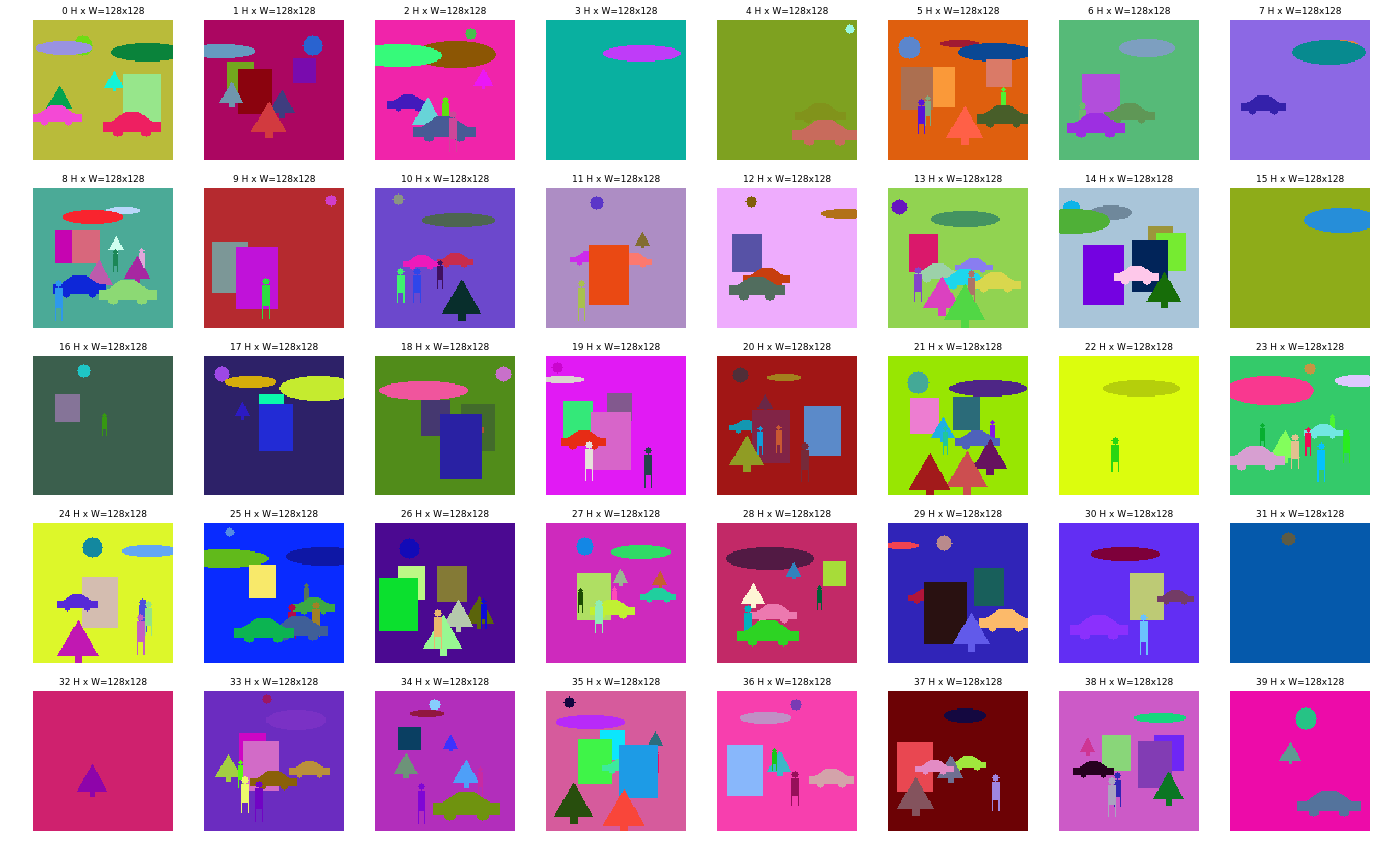

In [8]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

####  Display next image from generator

In [ ]:
train_batch_x, train_batch_y = next(test_generator)

In [ ]:

visualize.display_training_batch(dataset_test, train_batch_x)

#### Load a specific image using image_id

In [ ]:
from mrcnn.prep_notebook import run_full_inference_pipeline, run_mrcnn_inference_pipeline
# IMAGE_LIST = []      ## 62642 (persons),   68539 (trucks)36466 (surfers)  75040 (boat and persons)
# IMAGE_LIST = [36466] ## 36466 surfers. 5498 basketbal players, 27711,30531
# IMAGE_LIST = [5498] lots of motorcylces & persons - 
## Persons: #26026, #7719, 111864, 58240,  
# IMAGE_LIST = [89243] ##: Person, bicycle and traiffic lights
# IMAGE_LIST = [35347] ## - people and skaeboard  
# IMAGE_LIST = [59199]  ## books , sofa, living room
# IMAGE_LIST = [102868]  ## person in an airplane
# IMAGE_LIST = [101623] ## (cake and forks)
IMAGE_LIST = [107200]   ## people, snow and skis
# IMAGE_LIST = [41423]  ## (elephant & people)
# IMAGE_LIST = [49316]  ## Table, book, backpack, many bottles
# IMAGE_LIST = [75040] 
# IMAGE_LIST = [89243]
# IMAGE_LIST = [33477]  ## Table, bowl, cup, sandwich, knife
# IMAGE_LIST = [29731]
# IMAGE_LIST = [26763]  ## Table, chair, cup , bowl, bottle
# mrcnn_input = demo_image(dataset_train, mrcnn_model.config, IMAGE_LIST)
# outputs = run_mrcnn_inference_pipeline(mrcnn_model, dataset_test, image_ids = [50494] , verbose = 1)
outputs = run_full_inference_pipeline(mrcnn_model, fcn_model, dataset_test, image_ids = [50494] , verbose = 1)

In [ ]:
print(type(outputs), outputs.keys())

## Pass image through MRCNN and FCN

In [ ]:
# mrcnn_model.layer_info()
# from mrcnn.prep_notebook import run_pipeline, run_pipeline_on_input
# mrcnn_output, fcn_output, fcn_input = run_pipeline_on_input(mrcnn_model, fcn_model, mrcnn_input, verbose = 0)

model_pr_heatmap                = outputs['mrcnn_output'][0]          # layer:  0   shape: (1, 256, 256, 81)
model_pr_heatmap_scores         = outputs['mrcnn_output'][1]          # layer:  1   shape: (1, 81, 200, 11)
model_gt_heatmap                = outputs['mrcnn_output'][2]          # layer:  2   shape: (1, 256, 256, 81)
model_gt_heatmap_scores         = outputs['mrcnn_output'][3]          # layer:  3   shape: (1, 81, 200, 11)
model_fcn_heatmap               = outputs['fcn_output'][0]          # layer:  0   shape: (1, 256, 256, 81)
model_fcn_softmax               = outputs['fcn_output'][1]          # layer:  1   shape: ()
model_fcn_scores                = outputs['fcn_output'][2]
# model_MSE_loss                  = outputs['fcn_output'][2]          # layer:  1   shape: ()
# model_CE_loss                   = outputs['fcn_output'][3]          # layer:  1   shape: ()
# print('model_pr_heatmap       : ',model_gt_heatmap.shape)
# print('model_pr_heatmap_scores: ',model_gt_heatmap_scores.shape)
# print('model_gt_heatmap       : ',model_gt_heatmap.shape)
# print('model_gt_heatmap_scores: ',model_gt_heatmap_scores.shape)
# print('model_fcn_heatmap      :', model_fcn_heatmap.shape)
# print('model_fcn_softmax      :', model_fcn_softmax.shape)
# print(model_CE_loss,model_MSE_loss)
img_id = 0
print('Image id: ',img_id, ' Coco ID: ', dataset_test.image_info[img_id]['id'])
gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
pr_class_ids = np.unique(model_pr_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  Ground Truth ClassIds: {}'.format(img_id, gt_class_ids))
print('Image : {}  Predicted    ClassIds: {}'.format(img_id, pr_class_ids))

## Heatmap aggregation over a number of images

In [9]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries
np_format = {}
np_format['float']  = lambda x: "%10.4f" % x
np_format['int']    = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

### Load previously saved AP Results from file

In [ ]:
# All_APResults = {}

# path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
# prev_AP_results_file= 'test_AP_results_2019_01_14'
# with open(os.path.join(path, prev_AP_results_file+'.pkl'), 'rb') as outfile:
#     APRes = pickle.load(outfile)
# All_APResults = APRes

# # print('/'.join(weights_file.split('/')[-3:]))
# print(len(All_APResults.keys()))
# for i in sorted(All_APResults):
#     print(i, All_APResults[i]['Epochs'])

### Load weight file

In [13]:
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000'
fcn_files   = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
           'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
           'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
           'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
           'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

FILE_IDX = 10
weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", weights_file)
fcn_model.load_model_weights(weights_file)

Loading weights  /home/kbardool/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000/fcn_0821.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000/fcn_0821.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000/fcn_0821.h5
    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000/fcn_0821.h5 
FCN  MODEL Load weight file COMPLETE 


### Run `compute_ap` over images

In [17]:
    # for FILE_IDX in [10]:
    #     FILE_IDX = 10
    #     weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
    #     print("Loading weights ", weights_file)
    #     fcn_model.load_model_weights(weights_file)
    save_path = "/home/kbardool/git_projs/mrcnn3/train_coco/other"
    NUM_CLASSES = 7
    #     save_path = "E:\\git_projs\\MRCNN3\\train_newshapes\\other"
    epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
    print('Weight file: ', weights_file, ' epochs:', epochs)

#     IMGS = len(dataset_test.image_ids) # 1000
    IMGS = 500
    # image_ids = np.random.choice(dataset_test.image_ids, 300)
    image_ids = dataset_test.image_ids[:IMGS]
    print('Processing ',IMGS,' images')

    ###  Initialize data structures 
    agg_hm_shape = (256,256,NUM_CLASSES)
    pr_agg_hm  = np.zeros(agg_hm_shape)
    fcn_agg_hm = np.zeros(agg_hm_shape)
    pr_agg_hm_clipped  = np.zeros(agg_hm_shape)
    fcn_agg_hm_clipped = np.zeros(agg_hm_shape)
    
    gt_cls_counts = np.zeros((NUM_CLASSES), dtype = np.int)
    dt_cls_counts = np.zeros((NUM_CLASSES), dtype = np.int)
    
    gt_ttl_img_by_inst = np.zeros((NUM_CLASSES, 200), dtype = np.int)  # 16 is config.MAX_SHAPES_PER_IMAGE
    dt_ttl_img_by_inst = np.zeros((NUM_CLASSES, 200), dtype = np.int)  # 16 is config.MAX_SHAPES_PER_IMAGE
    
    imgs_one_gt = 0
    imgs_one_dt = 0
    sav_pr_min  = 0
    sav_pr_max  = 0
    sav_fcn_min = 0
    sav_fcn_max = 0
    failed_predicts = 0
    for image_id in image_ids:
        # Load image and ground truth data
        print('==> Calculate Heatmap aggregates for image_id : ', image_id)
        # Run object detection
        try:
            fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = 0)  
        except Exception as e :
            print('\n failure on mrcnn predict - image ids: {}'.format(image_id))
            print('\n dataset image info: ' )
            # print('\n Exception information:')
            # print(str(e))
            print(' n continue with next image' )
            failed_predicts += 1
            continue
        else:    
            pass
#             r = fcn_results[0]        
        
        r = fcn_results[0]
        
        gt_inst_per_class = np.bincount(np.abs(r['gt_class_ids']), minlength = NUM_CLASSES)
        dt_inst_per_class = np.bincount(r['class_ids']           , minlength = NUM_CLASSES)
        
        gt_cls_counts += gt_inst_per_class
        dt_cls_counts += dt_inst_per_class
        
        for i in range(NUM_CLASSES):
            gt_ttl_img_by_inst[i,gt_inst_per_class[i]] += 1
            dt_ttl_img_by_inst[i,dt_inst_per_class[i]] += 1
            
            
        if len(r['class_ids']) == 1: 
            imgs_one_dt += 1
        if len(r['gt_class_ids']) == 1:
            imgs_one_gt += 1
            
        pr_hm_clipped   = np.clip(r['pr_hm'], 0.0, 1.0)
        fcn_hm_clipped  = np.clip(r['fcn_hm'], 0.0, 1.0)

        pr_agg_hm          += r['pr_hm']
        fcn_agg_hm         += r['fcn_hm']
        pr_agg_hm_clipped  += np.clip(r['pr_hm'], 0.0, 1.0)
        fcn_agg_hm_clipped += np.clip(r['fcn_hm'], 0.0, 1.0)

        fcn_hm_max = np.max(r['fcn_hm'])
        fcn_hm_min = np.min(r['fcn_hm'])

        pr_hm_max = np.max(r['pr_hm'])
        pr_hm_min = np.min(r['pr_hm'])

        if fcn_hm_max > sav_fcn_max :
            sav_fcn_max = fcn_hm_max 

        if pr_hm_max > sav_pr_max:
            sav_pr_max = pr_hm_max

        if fcn_hm_min < sav_fcn_min :
            sav_fcn_min = fcn_hm_min 

        if pr_hm_min > sav_pr_min:
            sav_pr_min = pr_hm_min

#         np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
#         print('Results for image:')    
#         print('-------------------')
#         print(' # GT objects    :', len(r['gt_class_ids']))
#         print(r['gt_class_ids'])
#         print('gt_inst_per_class \n')
#         print(gt_inst_per_class)
#         print('gt_cls_counts \n')
#         print(gt_cls_counts)
        
#         print(' # of detections :', len(r['class_ids']))
#         print(r['class_ids'])
#         print('dt_inst_per_class \n')
#         print(dt_inst_per_class)   
#         print('dt_cls_counts \n')
#         print(dt_cls_counts)

#         print('   pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(pr_hm_min , pr_hm_max))
#         print('  fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(fcn_hm_min, fcn_hm_max))
#         print(' Original Heatmap:')
#         print('   pr_hm mins : ',np.min(r['pr_hm'], axis=(0,1)) ,' maxs: ', np.max(r['pr_hm'], axis=(0,1)))
#         print('   fcn_hm mins: ',np.min(r['fcn_hm'], axis=(0,1)),' maxs: ', np.max(r['fcn_hm'], axis=(0,1)))
#         print('   pr_hm sums : ',np.sum(r['pr_hm'], axis=(0,1)))
#         print('   fcn_hm sums: ',np.sum(r['fcn_hm'], axis=(0,1)))
#         print()
#         print(' Clipped Heatmap:')
#         print('   pr_hm mins : ',np.min(pr_hm_clipped, axis=(0,1)),' maxs: ', np.max(pr_hm_clipped, axis=(0,1)))
#         print('   fcn_hm mins: ',np.min(fcn_hm_clipped, axis=(0,1))  ,' maxs: ', np.max(fcn_hm_clipped, axis=(0,1)))
#         print('   pr_hm sums : ',np.sum(pr_hm_clipped, axis=(0,1)))
#         print('   fcn_hm sums: ',np.sum(fcn_hm_clipped, axis=(0,1)))


        if image_id+1 in [10,100,300, IMGS]:
            heatmaps_file =  'agg_heatmaps_epoch_'+epochs+'_'+str(image_id+1)+'_imgs.npz'
            print()
            print('Image count: ', image_id+1, '  Save to output file: ',os.path.join(save_path, heatmaps_file))
            np.savez_compressed(os.path.join(save_path, heatmaps_file),     
                            imgs_one_gt   = imgs_one_gt, 
                            imgs_one_dt   = imgs_one_dt,  
                            gt_cls_counts = gt_cls_counts, 
                            dt_cls_counts = dt_cls_counts,
                            gt_ttl_img_by_inst = gt_ttl_img_by_inst,
                            dt_ttl_img_by_inst = dt_ttl_img_by_inst,
                            sav_pr_min    = sav_pr_min  ,
                            sav_pr_max    = sav_pr_max  , 
                            sav_fcn_min   = sav_fcn_min , 
                            sav_fcn_max   = sav_fcn_max ,                     
                            pr_agg_hm     = pr_agg_hm  ,
                            fcn_agg_hm    = fcn_agg_hm  ,
                            pr_agg_hm_clipped  = pr_agg_hm_clipped,
                            fcn_agg_hm_clipped = fcn_agg_hm_clipped )                
            print()
            print('--------------------------------------------------')
            print(' Results at : ', image_id +1, ' processed images  - failed: ', failed_predicts)
            print('--------------------------------------------------')
            print(' pr_hm MIN : {:12.5f}      MAX: {:12.5f}'.format(sav_pr_min, sav_pr_max))
            print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_fcn_min, sav_fcn_max))
            print()
            print(' images with one gt object:', imgs_one_gt, '  one detection from MR-CNN:', imgs_one_dt)
            print(' Ground Truth by class:', gt_cls_counts)
            print(' Detections by class  :', dt_cls_counts)
            print()
            print(' Original Heatmap:')
            print('   pr_hm mins : ',np.min(pr_agg_hm , axis=(0,1)),' maxs: ', np.max(pr_agg_hm , axis=(0,1)))
            print('   fcn_hm mins: ',np.min(fcn_agg_hm, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm, axis=(0,1)))
            print('   pr_hm sums : ',np.sum(pr_agg_hm , axis=(0,1)))
            print('   fcn_hm sums: ',np.sum(fcn_agg_hm , axis=(0,1)))
            print()
            print(' Clipped Heatmap:')
            print('   pr_hm mins : ',np.min(pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(pr_agg_hm_clipped, axis=(0,1)))
            print('   fcn_hm mins: ',np.min(fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm_clipped, axis=(0,1)))
            print('   pr_hm sums : ',np.sum(pr_agg_hm_clipped, axis=(0,1)))
            print('   fcn_hm sums: ',np.sum(fcn_agg_hm_clipped, axis=(0,1)))
            print('\n')
            print('gt_ttl_img_by_inst')
            print(gt_ttl_img_by_inst[34:45,:16])
            print('dt_ttl_img_by_inst')
            print(dt_ttl_img_by_inst[34:45,:16])

    print('\n\n')
    print('Agg heatmap Calcs completed for epoch:', epochs , ' (Weight file:', weights_file, ')')


Weight file:  /home/kbardool/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000/fcn_0821.h5  epochs: 0821
Processing  1000  images
==> Calculate Heatmap aggregates for image_id :  0
==> Calculate Heatmap aggregates for image_id :  1
==> Calculate Heatmap aggregates for image_id :  2
==> Calculate Heatmap aggregates for image_id :  3
==> Calculate Heatmap aggregates for image_id :  4
==> Calculate Heatmap aggregates for image_id :  5
==> Calculate Heatmap aggregates for image_id :  6
==> Calculate Heatmap aggregates for image_id :  7
==> Calculate Heatmap aggregates for image_id :  8
==> Calculate Heatmap aggregates for image_id :  9

Image count:  10   Save to output file:  /home/kbardool/git_projs/mrcnn3/train_newshapes/other/agg_heatmaps_epoch_0821_10_imgs.npz

--------------------------------------------------
 Results at :  10  processed images 
--------------------------------------------------
 pr_hm MIN :      0.00000      MAX:      1.00000
 fcn_hm MIN:     -3.49891      

   pr_hm mins :  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [0.0000 3.3911 4.7123 3.3659 6.1426 4.7880 9.2380]
   fcn_hm mins:  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [ 0.0003  3.0872  5.8302  3.1113  6.7776  6.1689 14.0996]
   pr_hm sums :  [   0.0000 2812.5021 5842.5392 1459.3652 7111.3004 4430.7192 4838.0098]
   fcn_hm sums:  [   0.6606 2891.3197 8859.8795 2265.2064 9245.9076 8863.1044 6964.7675]


gt_ttl_img_by_inst
[[100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 32  24  22  18   2   1   1   0   0   0   0   0   0   0   0   0]
 [ 26  36  30   5   3   0   0   0   0   0   0   0   0   0   0   0]
 [ 30  70   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 33  34  17  15   1   0   0   0   0   0   0   0   0   0   0   0]
 [ 31  37  21  10   1   0   0   0   0   0   0   0   0   0   0   0]
 [ 22  47  26   3   1   1   0   0   0   0   0   0   0   0   0   0]]
dt_ttl_img_by_inst
[[100   0   0   0   0   0   0   0   0   0   0   0  

==> Calculate Heatmap aggregates for image_id :  228
==> Calculate Heatmap aggregates for image_id :  229
==> Calculate Heatmap aggregates for image_id :  230
==> Calculate Heatmap aggregates for image_id :  231
==> Calculate Heatmap aggregates for image_id :  232
==> Calculate Heatmap aggregates for image_id :  233
==> Calculate Heatmap aggregates for image_id :  234
==> Calculate Heatmap aggregates for image_id :  235
==> Calculate Heatmap aggregates for image_id :  236
==> Calculate Heatmap aggregates for image_id :  237
==> Calculate Heatmap aggregates for image_id :  238
==> Calculate Heatmap aggregates for image_id :  239
==> Calculate Heatmap aggregates for image_id :  240
==> Calculate Heatmap aggregates for image_id :  241
==> Calculate Heatmap aggregates for image_id :  242
==> Calculate Heatmap aggregates for image_id :  243
==> Calculate Heatmap aggregates for image_id :  244
==> Calculate Heatmap aggregates for image_id :  245
==> Calculate Heatmap aggregates for image_id 

==> Calculate Heatmap aggregates for image_id :  383
==> Calculate Heatmap aggregates for image_id :  384
==> Calculate Heatmap aggregates for image_id :  385
==> Calculate Heatmap aggregates for image_id :  386
==> Calculate Heatmap aggregates for image_id :  387
==> Calculate Heatmap aggregates for image_id :  388
==> Calculate Heatmap aggregates for image_id :  389
==> Calculate Heatmap aggregates for image_id :  390
==> Calculate Heatmap aggregates for image_id :  391
==> Calculate Heatmap aggregates for image_id :  392
==> Calculate Heatmap aggregates for image_id :  393
==> Calculate Heatmap aggregates for image_id :  394
==> Calculate Heatmap aggregates for image_id :  395
==> Calculate Heatmap aggregates for image_id :  396
==> Calculate Heatmap aggregates for image_id :  397
==> Calculate Heatmap aggregates for image_id :  398
==> Calculate Heatmap aggregates for image_id :  399
==> Calculate Heatmap aggregates for image_id :  400
==> Calculate Heatmap aggregates for image_id 

==> Calculate Heatmap aggregates for image_id :  538
==> Calculate Heatmap aggregates for image_id :  539
==> Calculate Heatmap aggregates for image_id :  540
==> Calculate Heatmap aggregates for image_id :  541
==> Calculate Heatmap aggregates for image_id :  542
==> Calculate Heatmap aggregates for image_id :  543
==> Calculate Heatmap aggregates for image_id :  544
==> Calculate Heatmap aggregates for image_id :  545
==> Calculate Heatmap aggregates for image_id :  546
==> Calculate Heatmap aggregates for image_id :  547
==> Calculate Heatmap aggregates for image_id :  548
==> Calculate Heatmap aggregates for image_id :  549
==> Calculate Heatmap aggregates for image_id :  550
==> Calculate Heatmap aggregates for image_id :  551
==> Calculate Heatmap aggregates for image_id :  552
==> Calculate Heatmap aggregates for image_id :  553
==> Calculate Heatmap aggregates for image_id :  554
==> Calculate Heatmap aggregates for image_id :  555
==> Calculate Heatmap aggregates for image_id 

==> Calculate Heatmap aggregates for image_id :  693
==> Calculate Heatmap aggregates for image_id :  694
==> Calculate Heatmap aggregates for image_id :  695
==> Calculate Heatmap aggregates for image_id :  696
==> Calculate Heatmap aggregates for image_id :  697
==> Calculate Heatmap aggregates for image_id :  698
==> Calculate Heatmap aggregates for image_id :  699
==> Calculate Heatmap aggregates for image_id :  700
==> Calculate Heatmap aggregates for image_id :  701
==> Calculate Heatmap aggregates for image_id :  702
==> Calculate Heatmap aggregates for image_id :  703
==> Calculate Heatmap aggregates for image_id :  704
==> Calculate Heatmap aggregates for image_id :  705
==> Calculate Heatmap aggregates for image_id :  706
==> Calculate Heatmap aggregates for image_id :  707
==> Calculate Heatmap aggregates for image_id :  708
==> Calculate Heatmap aggregates for image_id :  709
==> Calculate Heatmap aggregates for image_id :  710
==> Calculate Heatmap aggregates for image_id 

==> Calculate Heatmap aggregates for image_id :  848
==> Calculate Heatmap aggregates for image_id :  849
==> Calculate Heatmap aggregates for image_id :  850
==> Calculate Heatmap aggregates for image_id :  851
==> Calculate Heatmap aggregates for image_id :  852
==> Calculate Heatmap aggregates for image_id :  853
==> Calculate Heatmap aggregates for image_id :  854
==> Calculate Heatmap aggregates for image_id :  855
==> Calculate Heatmap aggregates for image_id :  856
==> Calculate Heatmap aggregates for image_id :  857
==> Calculate Heatmap aggregates for image_id :  858
==> Calculate Heatmap aggregates for image_id :  859
==> Calculate Heatmap aggregates for image_id :  860
==> Calculate Heatmap aggregates for image_id :  861
==> Calculate Heatmap aggregates for image_id :  862
==> Calculate Heatmap aggregates for image_id :  863
==> Calculate Heatmap aggregates for image_id :  864
==> Calculate Heatmap aggregates for image_id :  865
==> Calculate Heatmap aggregates for image_id 

###  save heatmaps  and data to .npz file 

In [6]:
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
heatmaps_file = AP_results_file= 'agg_heatmaps_epoch_'+epochs+'_'+str(IMGS)+'_imgs.npz'
print(epochs , ' ---> ', heatmaps_file)

print('  output file: ',os.path.join(save_path, heatmaps_file))

np.savez_compressed(os.path.join(save_path, heatmaps_file), 
                imgs_one_gt   = imgs_one_gt, 
                imgs_one_dt   = imgs_one_dt,  
                gt_cls_counts = gt_cls_counts, 
                dt_cls_counts = dt_cls_counts,
                gt_ttl_img_by_inst = gt_ttl_img_by_inst,
                dt_ttl_img_by_inst = dt_ttl_img_by_inst,                    
                sav_pr_min    = sav_pr_min  ,
                sav_pr_max    = sav_pr_max  , 
                sav_fcn_min   = sav_fcn_min , 
                sav_fcn_max   = sav_fcn_max ,                     
                pr_agg_hm     = pr_agg_hm  ,
                fcn_agg_hm    = fcn_agg_hm  ,
                pr_agg_hm_clipped  = pr_agg_hm_clipped,
                fcn_agg_hm_clipped = fcn_agg_hm_clipped )           

NameError: name 'files' is not defined

### devleoping code 

In [ ]:
print(' Length of results from MRCNN detect: ', len(fcn_results))
r = fcn_results[0]
print('fcn_results keys: ')
print('--------------------')
for i in sorted(r.keys()):
    print('   {:.<25s}  {}'.format(i , r[i].shape))        
print()

In [ ]:
agg_hm_shape = (128,128,7)
pr_agg_hm  = np.zeros(agg_hm_shape)
fcn_agg_hm = np.zeros(agg_hm_shape)
pr_agg_hm_clipped  = np.zeros(agg_hm_shape)
fcn_agg_hm_clipped = np.zeros(agg_hm_shape)
imgs_one_gt = 0
imgs_one_dt = 0
sav_pr_min  = 0
sav_pr_max  = 0
sav_fcn_min = 0
sav_fcn_max = 0

In [ ]:
gt_cls_count = np.zeros((7), dtype = np.int)
dt_cls_count = np.zeros((7), dtype = np.int)
print(r['gt_class_ids'])
print(r['class_ids'])

In [ ]:
gt_cnts = np.bincount(r['gt_class_ids'], minlength = 7)
dt_cnts = np.bincount(r['class_ids'], minlength = 7)
gt_cls_count += gt_cnts
dt_cls_count += dt_cnts
print(gt_cnts)
print(gt_cls_count)
print(dt_cnts)
print(dt_cls_count)

In [ ]:


if len(r['class_ids']) == 1: 
    imgs_one_dt += 1
if len(r['gt_class_ids']) == 1:
    imgs_one_gt  += 1
pr_hm_clipped   = np.clip(r['pr_hm'], 0.0, 1.0)
fcn_hm_clipped  = np.clip(r['fcn_hm'], 0.0, 1.0)

pr_agg_hm          += r['pr_hm']
fcn_agg_hm         += r['fcn_hm']
pr_agg_hm_clipped  += np.clip(r['pr_hm'], 0.0, 1.0)
fcn_agg_hm_clipped += np.clip(r['fcn_hm'], 0.0, 1.0)

fcn_hm_max = np.max(r['fcn_hm'])
fcn_hm_min = np.min(r['fcn_hm'])

pr_hm_max = np.max(r['pr_hm'])
pr_hm_min = np.min(r['pr_hm'])

if fcn_hm_max > sav_fcn_max :
    sav_fcn_max = fcn_hm_max 

if pr_hm_max > sav_pr_max:
    sav_pr_max = pr_hm_max

if fcn_hm_min < sav_fcn_min :
    sav_fcn_min = fcn_hm_min 

if pr_hm_min > sav_pr_min:
    sav_pr_min = pr_hm_min
    
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

print('Results for image:')    
print('-------------------')
print(' # GT objects in image    :', len(r['gt_class_ids'])     , '  # of detections :', len(r['class_ids']))
print('   pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(pr_hm_min , pr_hm_max))
print('  fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(fcn_hm_min, fcn_hm_max))
print(' Original Heatmap:')
print('   pr_hm mins : ',np.min(r['pr_hm'], axis=(0,1)) ,' maxs: ', np.max(r['pr_hm'], axis=(0,1)))
print('   fcn_hm mins: ',np.min(r['fcn_hm'], axis=(0,1)),' maxs: ', np.max(r['fcn_hm'], axis=(0,1)))
print('   pr_hm sums : ',np.sum(r['pr_hm'], axis=(0,1)))
print('   fcn_hm sums: ',np.sum(r['fcn_hm'], axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(pr_hm_clipped, axis=(0,1)),' maxs: ', np.max(pr_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_hm_clipped, axis=(0,1))  ,' maxs: ', np.max(fcn_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_hm_clipped, axis=(0,1)))



print('\n\n')
print(' Final Results:')
print('---------------')
print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_pr_min, sav_pr_max))
print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_fcn_min, sav_fcn_max))
print()
print(' images with one gt object:', imgs_one_gt, '  one detection from MR-CNN:', imgs_one_dt)
print()
print(' Original Heatmap:')
print('   pr_hm mins : ',np.min(pr_agg_hm , axis=(0,1)),' maxs: ', np.max(pr_agg_hm , axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_agg_hm, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_agg_hm , axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_agg_hm , axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_agg_hm_clipped, axis=(0,1)))

### Load and Display saved .npz file 

In [54]:
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
print(epochs)

heatmaps_file =  'agg_heatmaps_epoch_'+epochs+'_'+str(20)+'_imgs.npz'
print(heatmaps_file)

print('  output file: ',os.path.join(save_path, heatmaps_file))

0821
agg_heatmaps_epoch_0821_20_imgs.npz
  output file:  E:\git_projs\MRCNN3\train_newshapes\average_heatmaps\agg_heatmaps_epoch_0821_20_imgs.npz


In [55]:
loaddata = np.load(os.path.join(save_path, heatmaps_file))

type(loaddata)


l_imgs_one_gt = loaddata['imgs_one_gt']  
l_imgs_one_dt = loaddata['imgs_one_dt']
l_gt_ttl_img_by_inst = loaddata['gt_ttl_img_by_inst'],
l_dt_ttl_img_by_inst = loaddata['dt_ttl_img_by_inst'],
l_sav_pr_min  = loaddata['sav_pr_min'] 
l_sav_pr_max  = loaddata['sav_pr_max']  
l_sav_fcn_min = loaddata['sav_fcn_min']
l_sav_fcn_max = loaddata['sav_fcn_max']
l_pr_agg_hm   = loaddata['pr_agg_hm']
l_fcn_agg_hm  = loaddata['fcn_agg_hm']
l_pr_agg_hm_clipped = loaddata['pr_agg_hm_clipped']
l_fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']


print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(l_sav_pr_min, l_sav_pr_max))
print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(l_sav_fcn_min, l_sav_fcn_max))
print()
print(' images with one gt object:', l_imgs_one_gt, '  one detection from MR-CNN:', l_imgs_one_dt)
print()
print(' Original Heatmap:')
print('   pr_hm mins : ',np.min(l_pr_agg_hm , axis=(0,1)),' maxs: ', np.max(l_pr_agg_hm , axis=(0,1)))
print('   fcn_hm mins: ',np.min(l_fcn_agg_hm, axis=(0,1)),' maxs: ', np.max(l_fcn_agg_hm, axis=(0,1)))
print('   pr_hm sums : ',np.sum(l_pr_agg_hm , axis=(0,1)))
print('   fcn_hm sums: ',np.sum(l_fcn_agg_hm , axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(l_pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(l_pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(l_fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(l_fcn_agg_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(l_pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(l_fcn_agg_hm_clipped, axis=(0,1)))

  pr_hm MIN:      0.00000      MAX:      1.00000
 fcn_hm MIN:     -3.56792      MAX:      1.18562

 images with one gt object: 2   one detection from MR-CNN: 2

 Original Heatmap:
   pr_hm mins :  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [0.0000 1.8770 2.3233 2.0810 2.6800 1.7789 3.5330]
   fcn_hm mins:  [ -0.0001 -25.1418 -14.9241 -23.9941 -12.7741 -23.3497 -18.0801]  maxs:  [ 0.0001 -0.7623  0.2094 -1.0247  0.3314 -0.3817  2.5551]
   pr_hm sums :  [   0.0000  438.3976 1092.1847  332.0509 1660.9972  675.0004 1019.0927]
   fcn_hm sums:  [     -0.0084 -124706.8728  -81722.7683 -136344.3595  -81049.0407 -128318.6379  -81012.0410]

 Clipped Heatmap:
   pr_hm mins :  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [0.0000 1.8770 2.3233 2.0810 2.6800 1.7789 3.5330]
   fcn_hm mins:  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [0.0001 1.0298 2.2760 1.6191 2.8744 2.1363 4.0747]
   pr_hm sums :  [   0.0000  438.3976 1092.1847  332.0509 1660.9972  675.

## Load and display Heatmaps

In [18]:
# epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
epochs = '0821'
count  = '1000'
print(epochs, count)

heatmaps_file =  'agg_heatmaps_epoch_'+epochs+'_'+count+'_imgs.npz'
print(heatmaps_file)

print('  input file: ',os.path.join(save_path, heatmaps_file))

0821 1000
agg_heatmaps_epoch_0821_1000_imgs.npz
  input file:  /home/kbardool/git_projs/mrcnn3/train_newshapes/other/agg_heatmaps_epoch_0821_1000_imgs.npz


In [32]:
np_format = {}
np_format['float']  = lambda x: "%10.4f" % x
np_format['int']    = lambda x: "%8d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

loaddata = np.load(os.path.join(save_path, heatmaps_file))

print(type(loaddata))
print(type(loaddata['gt_ttl_img_by_inst']),'  ', type(loaddata['gt_ttl_img_by_inst'][0]))
gt_cls_counts = loaddata['gt_cls_counts']  
dt_cls_counts = loaddata['dt_cls_counts']  
imgs_one_gt   = loaddata['imgs_one_gt']  
imgs_one_dt   = loaddata['imgs_one_dt'] 
gt_ttl_img_by_inst = loaddata['gt_ttl_img_by_inst']
dt_ttl_img_by_inst = loaddata['dt_ttl_img_by_inst']

sav_pr_min    = loaddata['sav_pr_min'] 
sav_pr_max    = loaddata['sav_pr_max']  
sav_fcn_min   = loaddata['sav_fcn_min']
sav_fcn_max   = loaddata['sav_fcn_max']
pr_agg_hm     = loaddata['pr_agg_hm']
fcn_agg_hm    = loaddata['fcn_agg_hm']
pr_agg_hm_clipped = loaddata['pr_agg_hm_clipped']
fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']

   
print('\n\n')
print('Agg heatmap Calcs complete for epoch:', epochs , ' (heatmap file:', heatmaps_file, ')')
print('\n\n')
print(' Final Results:')
print('---------------')
print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_pr_min, sav_pr_max))
print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_fcn_min, sav_fcn_max))
print()
print(' images with one gt object:', imgs_one_gt, '  one detection from MR-CNN:', imgs_one_dt)
print(' Ground Truth by class:', gt_cls_counts)
print(' Detections by class  :', dt_cls_counts)
print()
print(' Original Heatmap:')
print('    pr_hm mins: ',np.min(pr_agg_hm , axis=(0,1)))
print('          maxs: ',np.max(pr_agg_hm , axis=(0,1)))
print()
print('   fcn_hm mins: ',np.min(fcn_agg_hm, axis=(0,1)))
print('          maxs: ',np.max(fcn_agg_hm, axis=(0,1)))
print()
print('   pr_hm sums : ',np.sum(pr_agg_hm , axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_agg_hm, axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_agg_hm_clipped, axis=(0,1)))

print('\n gt_ttl_img_by_inst', type(gt_ttl_img_by_inst))
print(' ------------------')
print(gt_ttl_img_by_inst)
print('\n dt_ttl_img_by_inst')
print(' ------------------')
print(dt_ttl_img_by_inst)

<class 'numpy.lib.npyio.NpzFile'>
<class 'numpy.ndarray'>    <class 'numpy.ndarray'>



Agg heatmap Calcs complete for epoch: 0821  (heatmap file: agg_heatmaps_epoch_0821_1000_imgs.npz )



 Final Results:
---------------
  pr_hm MIN:      0.00000      MAX:      1.00000
 fcn_hm MIN:     -4.08529      MAX:      1.22954

 images with one gt object: 77   one detection from MR-CNN: 76
 Ground Truth by class: [       0     1331     1158      674     1131     1160     1219]
 Detections by class  : [       0     1434     1308      682     1342     1147     1214]

 Original Heatmap:
    pr_hm mins:  [    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000]
          maxs:  [    0.0000    15.6126    28.7602    17.4910    34.0293    27.2935    80.1132]

   fcn_hm mins:  [   -0.0031 -1038.8784  -590.9373  -901.8908  -552.0166  -999.6105  -676.5565]
          maxs:  [    0.0030   -37.5132    10.4562   -53.2500    16.4373   -19.0167    53.2629]

   pr_hm sums :  [    0.0000 275

## Display Heatmaps

In [1]:
import matplotlib.pyplot as plt
import math
def display_fcn_input(fcn_hm, gt_cls_counts,  dt_cls_counts, cmap = 'gray', columns= 4, title = 'FCN Heatmaps'):
    n_features = fcn_hm.shape[-1]
    rows = math.ceil(n_features / columns )
#     print()
#     print('Layer:', LAYER, ' - ',layer_names[LAYER], '   Shape: ', activations[LAYER][0,:,:,:].shape, ' # features: ', n_features, rows, columns)
    fig = plt.figure(figsize=(8 *columns, 8* rows))
    for idx in range(n_features): 
        row = idx // columns
        col = idx  % columns
        subplot = (row * columns) + col +1    
        ax= fig.add_subplot(rows, columns, subplot)
        subttl = '{} - GT:{:4d}  Det:{:4d}'.format(class_names[idx], gt_cls_counts[idx], dt_cls_counts[idx])
        ax.set_title(subttl, fontsize=20)
        ax.tick_params(axis='both', labelsize = 5)
        surf = ax.matshow(fcn_hm[:,:,idx], cmap = cmap , interpolation='none')
        cbar = fig.colorbar(surf, shrink=0.6, aspect=30, fraction=0.05)
        cbar.ax.tick_params(labelsize=14) 
        
    ttl = title + ' {}'.format(str(fcn_hm.shape))           
    fig.suptitle(ttl, fontsize = 24, ha ='center' )        
    plt.subplots_adjust(top=0.9, bottom=0.02, left=0.02, right=0.98, hspace=0.25, wspace=0.15)
    plt.show()

def display_fcn_input_1(fcn_hm, gt_cls_counts,  dt_cls_counts, cmap = 'gray', columns= 4, title = 'FCN Heatmaps'):
    n_features = fcn_hm.shape[-1]
    rows = math.ceil(n_features / columns )
#     print()
#     print('Layer:', LAYER, ' - ',layer_names[LAYER], '   Shape: ', activations[LAYER][0,:,:,:].shape, ' # features: ', n_features, rows, columns)
    fig = plt.figure(figsize=(8 *columns, 8* rows))
    for idx in range(n_features): 
        row = idx // columns
        col = idx  % columns
        subplot = (row * columns) + col +1    
        ax= fig.add_subplot(rows, columns, subplot)
        subttl = '{} - GT:{:4d}  Det:{:4d}'.format(class_names[idx], gt_cls_counts[idx], dt_cls_counts[idx])
        ax.set_title(subttl, fontsize=20)
        ax.tick_params(axis='both', labelsize = 5)
        
        surf = ax.imshow(fcn_hm[:,:,idx], cmap = cmap , interpolation='none')
        cbar = fig.colorbar(surf, shrink=0.6, aspect=30, fraction=0.05)
        cbar.ax.tick_params(labelsize=14) 
        
    ttl = title + ' {}'.format(str(fcn_hm.shape))           
    fig.suptitle(ttl, fontsize = 24, ha ='center' )        
    plt.subplots_adjust(top=0.9, bottom=0.02, left=0.02, right=0.98, hspace=0.25, wspace=0.15)
    plt.show()

    
def display_fcn_input_2(fcn_hm, cmap = 'gray', size  = 4):
    cols = 3
    
    n_features = fcn_hm.shape[-1]
    rows = math.ceil(n_features / cols )
    fig , ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    print(n_features, rows )
#     print('Layer:', LAYER, ' - ',layer_names[LAYER], '   Shape: ', activations[LAYER][0,:,:,:].shape, ' # features: ', n_features, rows, columns)
#     fig = plt.figure(figsize=(8 *columns, 12* rows))
    for idx in range(n_features): 
        row = idx // cols
        col = idx  % cols
        subplot = (row * cols) + col +1    
        print(row,col, subplot)
#         ax= fig.add_subplot(rows, columns, subplot)
        ax[row,col].set_title(class_names[idx], fontsize=20)
        ax[row,col].tick_params(axis='both', labelsize = 5)

        surf = ax[row,col].matshow(fcn_hm[:,:,idx], cmap = cmap , interpolation='none')
        cbar = ax[row,col].colorbar(cax = surf, shrink=0.6, aspect=30, fraction=0.05)
        
        
        
    ttl = title + ' {}'.format(str(fcn_hm.shape))        
    fig.suptitle(title, fontsize = 18, ha ='center' )      
    fig.tight_layout(rect=[0, 0.0, 1, 0.95])   ## [left, bottom, right, top]
    plt.show()
    
    
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def display_pairwise_heatmap(show_matrix, y_labels,title = '' , colormap = cm.coolwarm):
    # show_labels = labels[1:10]
#     num_classes = len(show_labels)
    #     print(' num classes: ', num_classes, 'matrix shape: ',show_matrix.shape)
    n_rows = show_matrix.shape[0] 
    n_cols = show_matrix.shape[1]
    show_labels_x = [str(i) for i in range(n_cols)] 
    show_labels_y = [y_labels[i] for i in range(n_rows)] 

    fig, ax = plt.subplots(1,1,figsize=((n_rows)*2, (n_cols)*2))
    im = ax.imshow(show_matrix, cmap=colormap)
    # cmap=cm.bone, #  cmap=cm.Dark2 # cmap = cm.coolwarm   # cmap=cm.YlOrRd
    # We want to show all ticks...
    ax.set_xticks(np.arange(n_cols))
    ax.set_yticks(np.arange(n_rows))
    
    # ... and label them with the respective list entries
    ax.set_xticklabels(show_labels_x, size = 9)
    ax.set_yticklabels(show_labels_y, size = 9)
    ax.set_xlabel('Number of Instances ', size = 11)
    ax.set_ylabel('Class', size = 11 )

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right",rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    for i in range(n_rows):
        for j in range(n_cols):
                text = ax.text(j, i, show_matrix[i, j], size=12, 
                           ha="center", va="center", color="w")
 
    ax.set_title("class instances in image"+ title.upper(), size = 14)
    # fig.tight_layout()
    plt.show()
    return  fig

NameError: name 'cm' is not defined

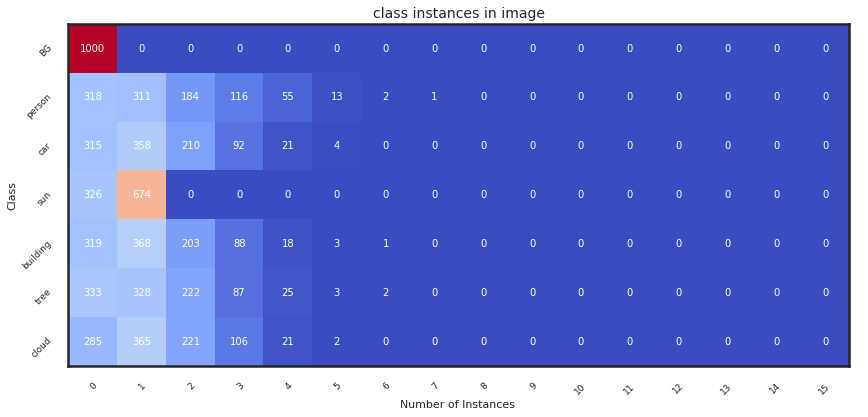

In [84]:
hmfig = display_pairwise_heatmap(gt_ttl_img_by_inst, class_names)

### mask_rcnn output

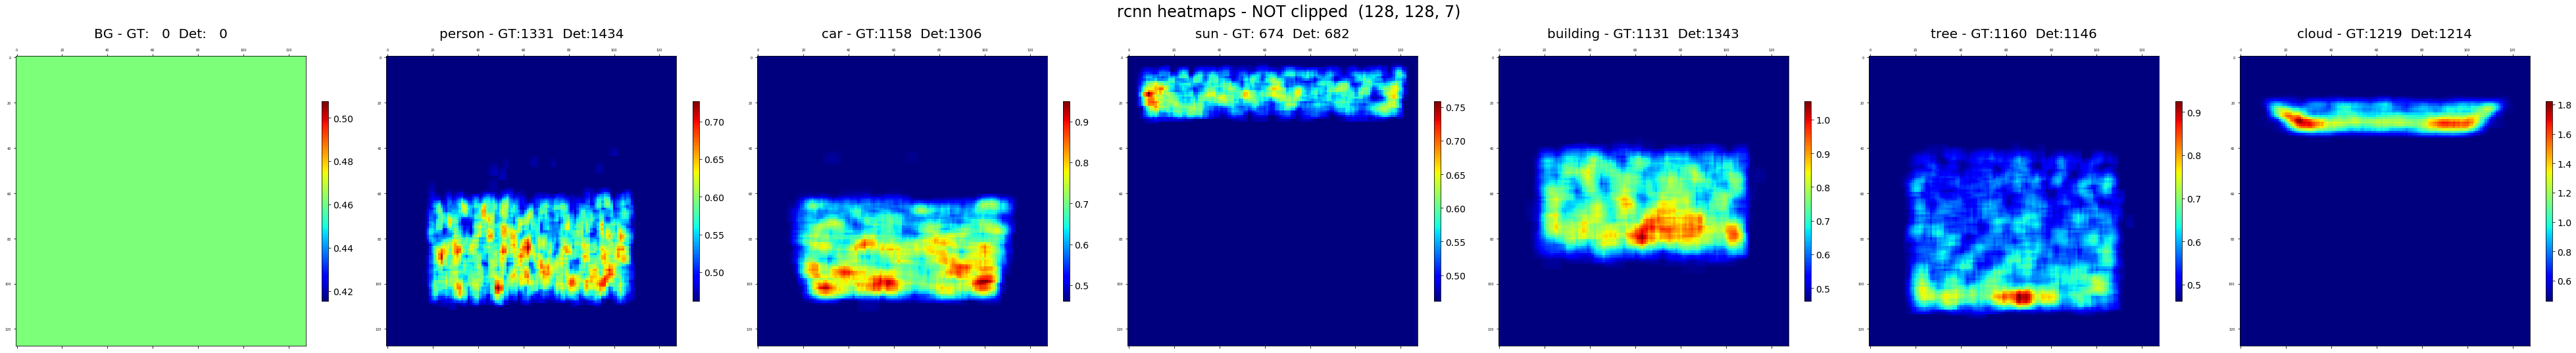

In [28]:
display_fcn_input(pr_agg_hm, gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - NOT clipped ')

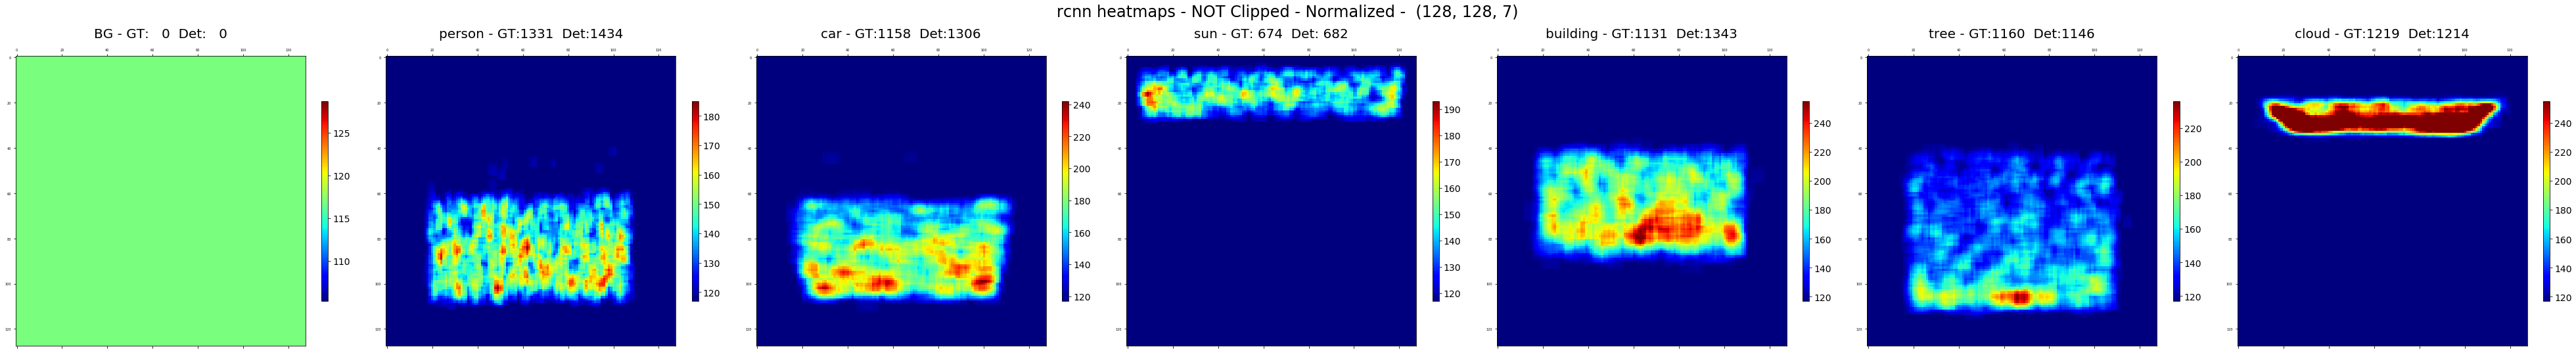

In [19]:
display_fcn_input(deprocess_image(pr_agg_hm), gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - NOT Clipped - Normalized - ')

###  mask_rcnn clipped  (same as mask_rcnn output)

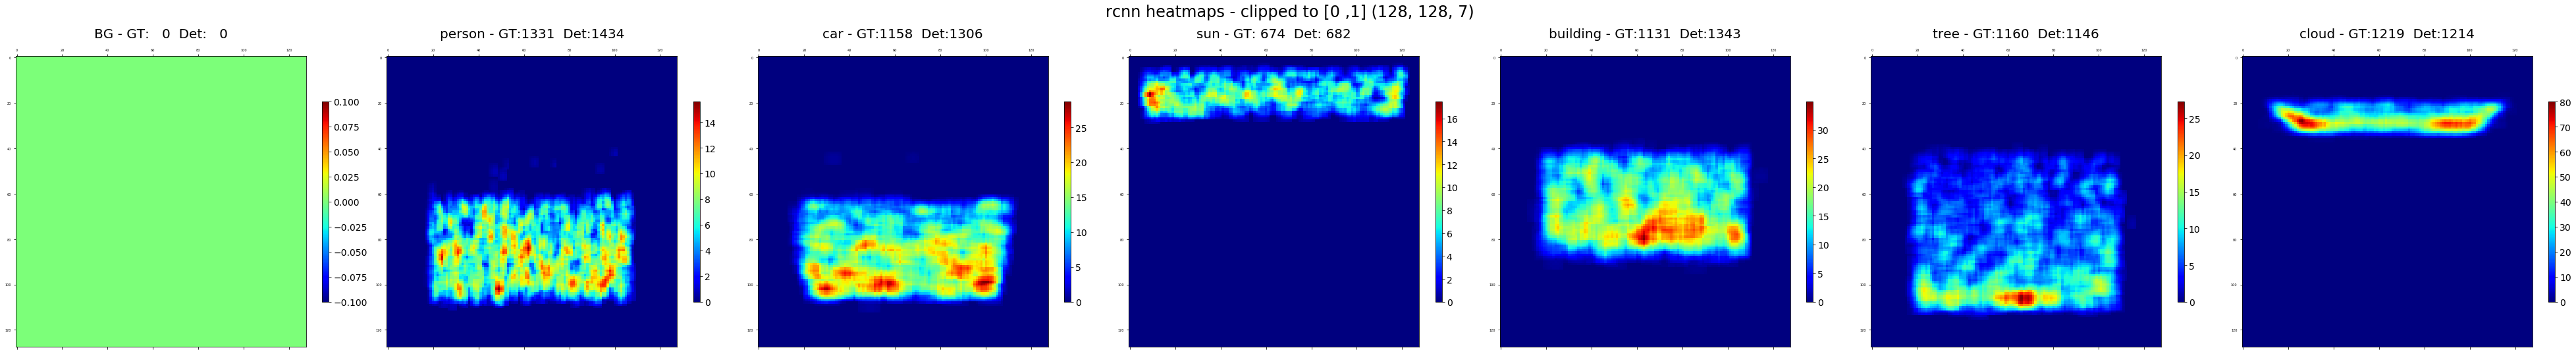

In [20]:
display_fcn_input(pr_agg_hm_clipped, gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - clipped to [0 ,1]')

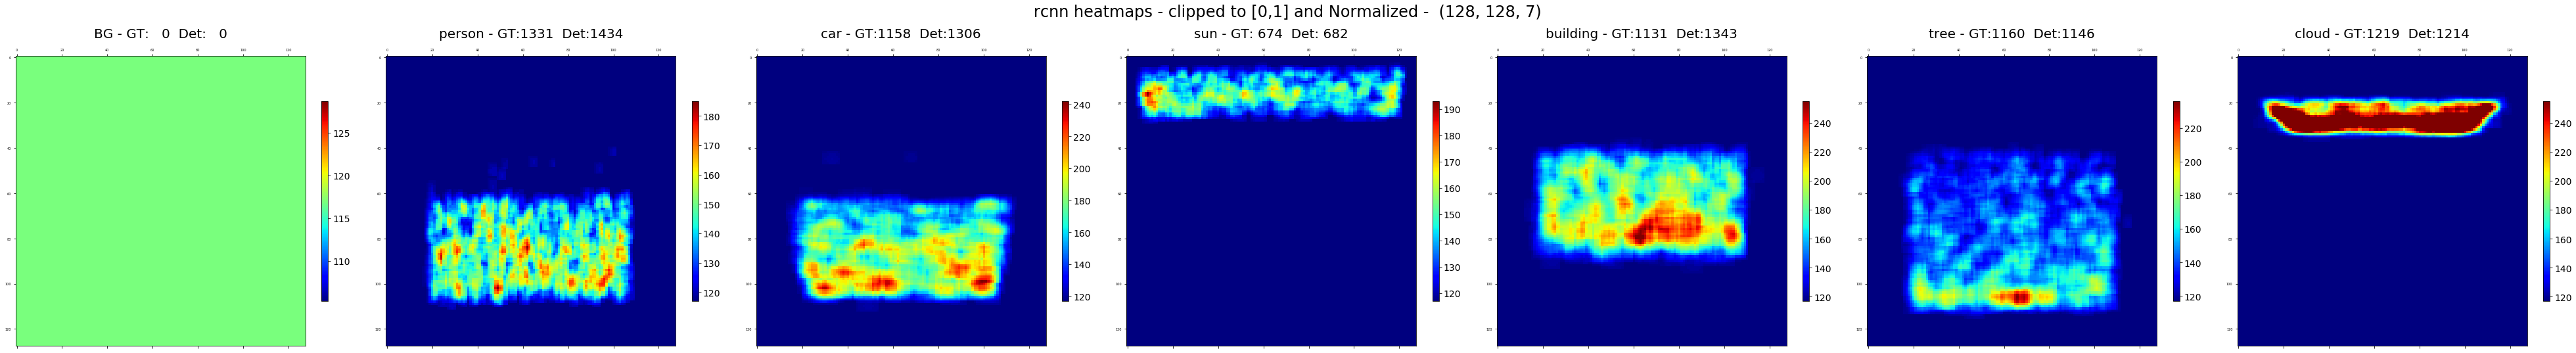

In [21]:
display_fcn_input(deprocess_image(pr_agg_hm_clipped), gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - clipped to [0,1] and Normalized - ')

###  fcn

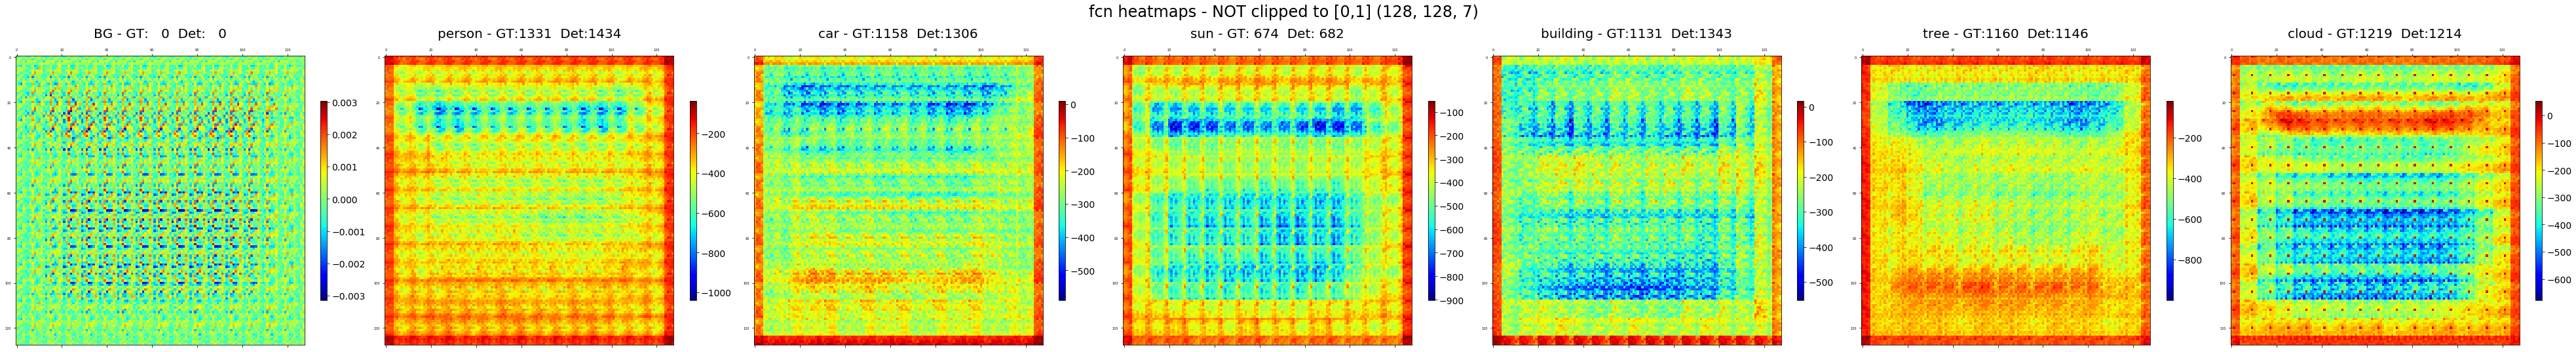

In [34]:
display_fcn_input(fcn_agg_hm, gt_cls_counts, dt_cls_counts, cmap = 'jet', columns =7, title = 'fcn heatmaps - NOT clipped to [0,1]')

### fcn normalized

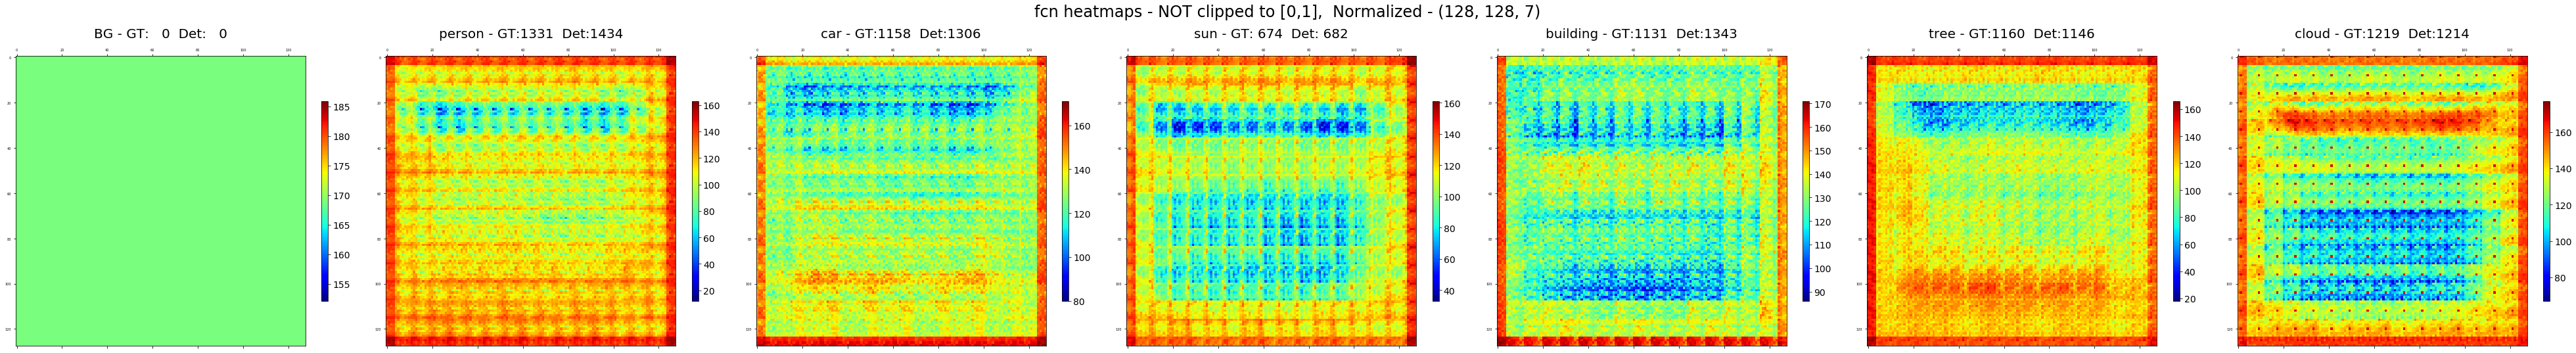

In [35]:
display_fcn_input(deprocess_image(fcn_agg_hm), gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'fcn heatmaps - NOT clipped to [0,1],  Normalized -')

### fcn clipped

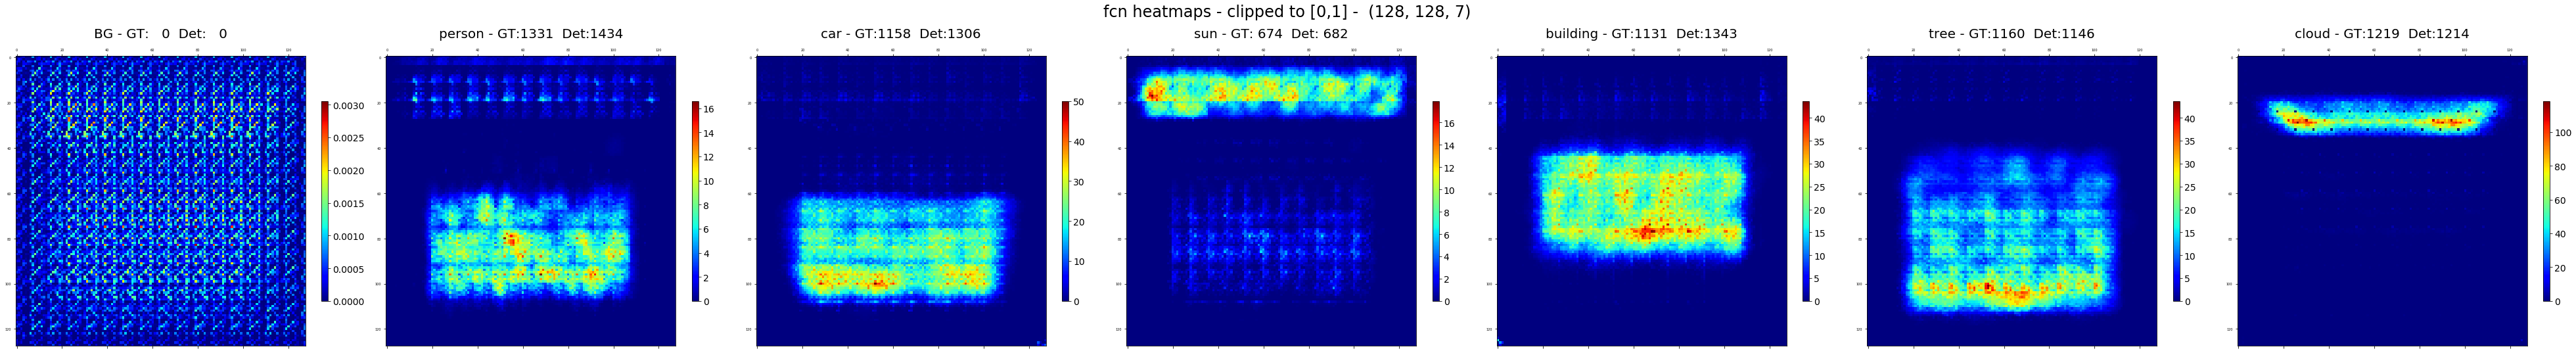

In [36]:
display_fcn_input(fcn_agg_hm_clipped, gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'fcn heatmaps - clipped to [0,1] - ')

### fcn clipped - normalized

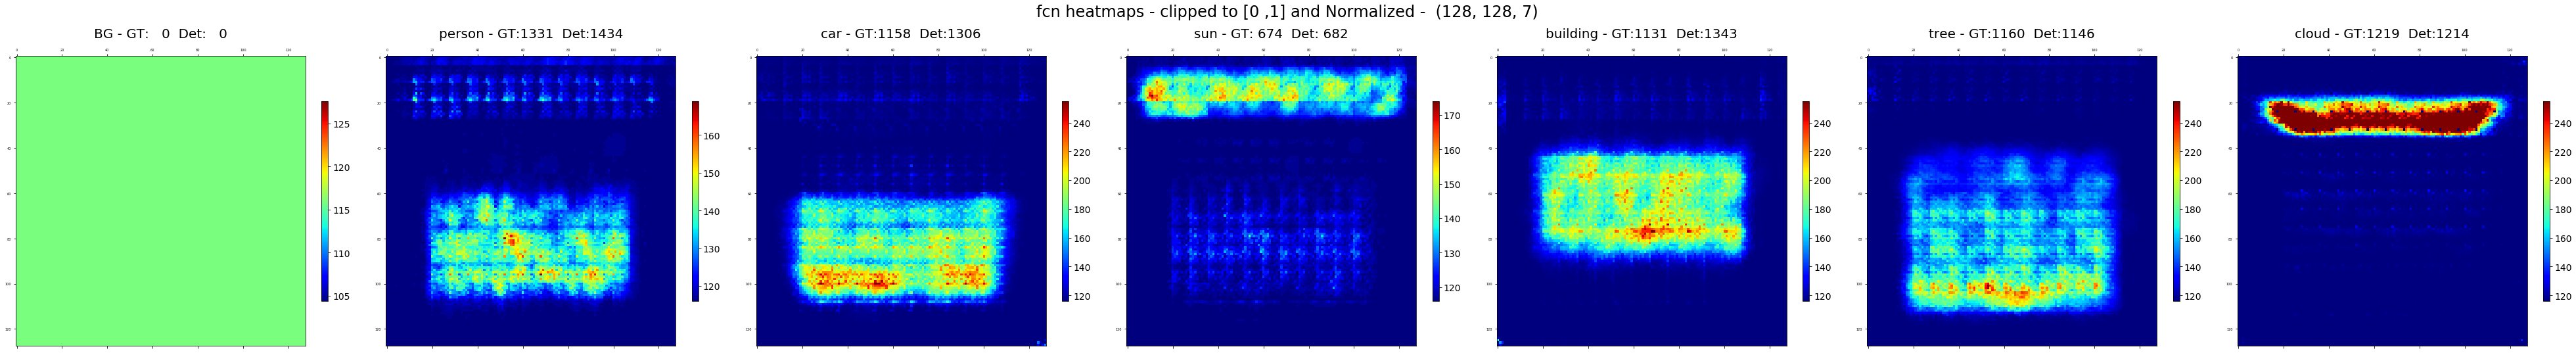

In [37]:
display_fcn_input(deprocess_image(fcn_agg_hm_clipped), gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'fcn heatmaps - clipped to [0 ,1] and Normalized - ')

### 2D Plots  

####  2D plot of `model_gt_heatmap` returned from model

In [ ]:
fig = visualize.plot_2d_heatmap(model_gt_heatmap, model_gt_heatmap_scores, img_id, gt_class_ids, 
                          class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

####  2D plot of `pred_heatmap_norm` returned from MRCNN 

In [ ]:
fig = visualize.plot_2d_heatmap(model_pr_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, columns = 3, 
                            class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model

In [ ]:
fig = visualize.plot_2d_heatmap(model_fcn_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, columns = 3,
                          class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model - ALL CLASSES

In [ ]:
fig = visualize.plot_2d_heatmap(model_fcn_heatmap, model_gt_heatmap_scores, img_id,
                                class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

In [ ]:
fig.savefig('fcn_heatmaps_2d.png')

####  2D comparative display `pred_heatmap` / `fcn_heatmap`  

In [ ]:
fig = visualize.plot_2d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, model_pr_heatmap_scores, 
                        img_id, class_ids = pr_class_ids, class_names = coco_class_names, scale = 4, scaling = True )    

###  3D Plots

####  3D plot of  `gt_heatmap_norm` returned form code above

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_3d_heatmap(model_gt_heatmap, img_id, gt_class_ids, class_names = coco_class_names, scaling='class')

####  3D plot of `pred_heatmap_norm` returned form model

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_pr_heatmap, img_id, pr_class_ids, class_names = coco_class_names, zlim = 'class' , scaling = 'none')

####  3D plot of `fcn_heatmap` returned form model - only classes in pred_scores

In [ ]:
print(np.max(model_fcn_heatmap), np.min(model_fcn_heatmap))

print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_fcn_heatmap, img_id, pr_class_ids,class_names = coco_class_names, scaling = 'none')

####  3D plot of `fcn_heatmap` returned form model - all classes

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
#     plot_3d_heatmap(model_fcn_heatmap, img_id, class_ids,class_names = class_names, size = (8,8), zlim=0)
visualize.plot_3d_heatmap(model_fcn_heatmap, img_id, class_names = coco_class_names, columns = 3,scaling = 'all')

####  3D comparative display `pred_heatmap` / `fcn_heatmap` 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, img_id, class_ids = pr_class_ids, 
                            class_names = coco_class_names, size=(8,8), zlim = 'all' , scaling = 'all')

####  3D comparative display `gt_heatmap` / `fcn_heatmap` 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_3d_heatmap_compare(model_gt_heatmap, model_fcn_heatmap, img_id, gt_class_ids, class_names = coco_class_names, scaling = 'none')

### Overlay predictions on image

#### Overlay image with gt_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn(mrcnn_input, mrcnn_output, 0, hm = 'gt', columns = 3, 
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names)

#### Overlay image with pred_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn(mrcnn_input, mrcnn_output, 0, hm = 'pr', columns = 3,
                     config = mrcnn_model.config, class_ids = pr_class_ids, class_names = coco_class_names)

#### Overlay image with fcn_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn_fcn(mrcnn_input, mrcnn_output, 0, heatmap = model_fcn_heatmap, hm = 'gt', columns = 3,
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'clip')

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: center;
}
</style>
""")

#### Overlay image with gt_heatmaps and fcn_heatmaps

In [ ]:
visualize.display_heatmaps_compare(mrcnn_input, mrcnn_output, heatmap = model_fcn_heatmap, image_id = 0, 
                                   hm = 'gt', config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'each')

#### Overlay image with pr_heatmaps and fcn_heatmaps

In [ ]:
visualize.display_heatmaps_compare(mrcnn_input, mrcnn_output, heatmap = model_fcn_heatmap, image_id = 0, hm = 'pr', 
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'each')